# Exploratory visualizations for Ford gobike dataset
## by Mariam Ashraf

## Preliminary Wrangling

In 2017 Ford gobike system was a re-launch of Bay Wheels which was a regional public bicycle sharing system in California's San Francisco Bay Area in a partnership with Ford Motor Company, like other bike share systems, consists of a fleet of specially designed, durable bikes. The bikes are available for use 24 hours/day, 7 days/week, 365 days/year and riders have access to all bikes in the network when they become a member or purchase a pass.

In [4]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb


%matplotlib inline

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [5]:
#At first load the ford go bike dataset 2017

df = pd.read_csv('2017-fordgobike-tripdata.csv')
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type
0,80110,2017-12-31 16:57:39.6540,2018-01-01 15:12:50.2450,74,Laguna St at Hayes St,37.776435,-122.426244,43,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,96,Customer
1,78800,2017-12-31 15:56:34.8420,2018-01-01 13:49:55.6170,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96,Dolores St at 15th St,37.766210,-122.426614,88,Customer
2,45768,2017-12-31 22:45:48.4110,2018-01-01 11:28:36.8830,245,Downtown Berkeley BART,37.870348,-122.267764,245,Downtown Berkeley BART,37.870348,-122.267764,1094,Customer
3,62172,2017-12-31 17:31:10.6360,2018-01-01 10:47:23.5310,60,8th St at Ringold St,37.774520,-122.409449,5,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,2831,Customer
4,43603,2017-12-31 14:23:14.0010,2018-01-01 02:29:57.5710,239,Bancroft Way at Telegraph Ave,37.868813,-122.258764,247,Fulton St at Bancroft Way,37.867789,-122.265896,3167,Subscriber


In [6]:
df.shape

(519700, 13)

In [7]:
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id
count,519700.000000,519700.000000,519700.000000,519700.000000,519700.000000,519700.000000,519700.000000,519700.000000
mean,1099.009521,95.034245,37.771653,-122.363927,92.184041,37.771844,-122.363236,1672.533079
std,3444.146451,86.083078,0.086305,0.105573,84.969491,0.086224,0.105122,971.356959
min,61.000000,3.000000,37.317298,-122.444293,3.000000,37.317298,-122.444293,10.000000
25%,382.000000,24.000000,37.773492,-122.411726,23.000000,37.774520,-122.410345,787.000000
50%,596.000000,67.000000,37.783521,-122.398870,66.000000,37.783830,-122.398525,1728.500000
75%,938.000000,139.000000,37.795392,-122.391034,134.000000,37.795392,-122.391034,2520.000000
max,86369.000000,340.000000,37.880222,-121.874119,340.000000,37.880222,-121.874119,3733.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519700 entries, 0 to 519699
Data columns (total 13 columns):
duration_sec               519700 non-null int64
start_time                 519700 non-null object
end_time                   519700 non-null object
start_station_id           519700 non-null int64
start_station_name         519700 non-null object
start_station_latitude     519700 non-null float64
start_station_longitude    519700 non-null float64
end_station_id             519700 non-null int64
end_station_name           519700 non-null object
end_station_latitude       519700 non-null float64
end_station_longitude      519700 non-null float64
bike_id                    519700 non-null int64
user_type                  519700 non-null object
dtypes: float64(4), int64(4), object(5)
memory usage: 51.5+ MB


All the columns have the same lentgh, no missing values but i will also check null values

In [9]:
df.isnull().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
dtype: int64

In [10]:
# check for NAN values
df.isna().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
dtype: int64

NO NAN values too

In [11]:
df.duplicated().sum()

0

**Therefore, no missing values, Nan or duplicated values.**

**In the cleaning phase I will only change the types of some variables to the correct data types**

In [12]:
df.start_time = pd.to_datetime(df.start_time)
df.end_time = pd.to_datetime(df.end_time)
df.user_type = df.user_type.astype('category')

In [13]:
df['duration_hours']= df['duration_sec']/(60*60)
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,duration_hours
0,80110,2017-12-31 16:57:39.654,2018-01-01 15:12:50.245,74,Laguna St at Hayes St,37.776435,-122.426244,43,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,96,Customer,22.252778
1,78800,2017-12-31 15:56:34.842,2018-01-01 13:49:55.617,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96,Dolores St at 15th St,37.766210,-122.426614,88,Customer,21.888889
2,45768,2017-12-31 22:45:48.411,2018-01-01 11:28:36.883,245,Downtown Berkeley BART,37.870348,-122.267764,245,Downtown Berkeley BART,37.870348,-122.267764,1094,Customer,12.713333
3,62172,2017-12-31 17:31:10.636,2018-01-01 10:47:23.531,60,8th St at Ringold St,37.774520,-122.409449,5,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,2831,Customer,17.270000
4,43603,2017-12-31 14:23:14.001,2018-01-01 02:29:57.571,239,Bancroft Way at Telegraph Ave,37.868813,-122.258764,247,Fulton St at Bancroft Way,37.867789,-122.265896,3167,Subscriber,12.111944


In [14]:
df['start_weekday'] = df['start_time'].dt.strftime('%a')

In [15]:
df['strt_month'] = df['start_time'].dt.strftime('%B')

### What is the structure of your dataset?

 13 columns
 519700 rows/ records,
 I didn't found any missing values or duplicated values

### What is/are the main feature(s) of interest in your dataset?

Start and end month or weekday and user_type also

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

duration_hours, strt_month, start_weekday, and user_type.

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

In [16]:
color_base=sb.color_palette()[0]

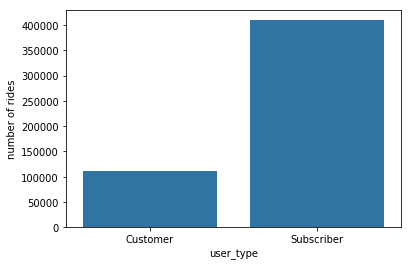

In [17]:
sb.countplot(data=df, x='user_type', color=color_base);
plt.ylabel('number of rides');

**The bar chart above shows that the subscriber user type has high number of ridings than the customers.**

In [18]:
months_order=df['strt_month'].value_counts().index

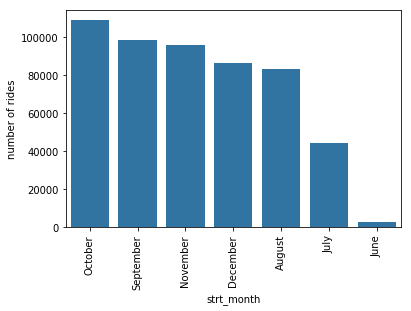

In [19]:
sb.countplot(data=df, x='strt_month', color=color_base, order=months_order);
plt.xticks(rotation=90);
plt.ylabel('number of rides');

**Because start month feature is also a qualitative feature like User type, I used also bar chart for visualization and I found that in june number of ridings decreases too much relative to other months, and in january, february, march, and april there are no records for riding starts.**

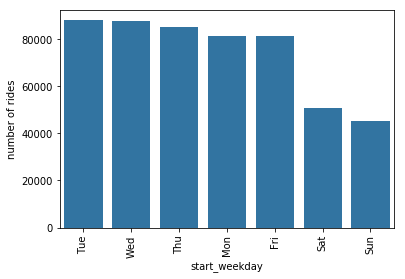

In [20]:
day_order=df['start_weekday'].value_counts().index
sb.countplot(data=df, x='start_weekday', color=color_base, order=day_order);
plt.xticks(rotation=90);
plt.ylabel('number of rides');

**From this visualization we can see that all the days of the week have almost the same number of ridings except saturday, and sunday.**

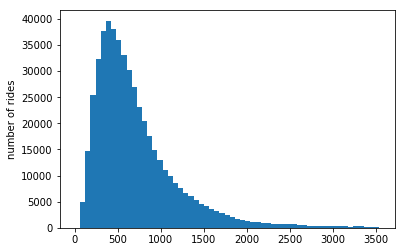

In [21]:
bins_e = np.arange(0, 3600, 60)

plt.hist(data = df, x = 'duration_sec', bins = bins_e);

plt.ylabel('number of rides');

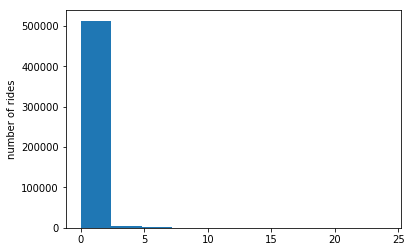

In [22]:
#bin_edges = np.arange(0, 45/60, 1/60)

plt.hist(data = df, x = 'duration_hours');

plt.ylabel('number of rides');
plt.xlim=(0,None);

**Here we need scaling to see more clear visualization for duration in hours, because of outliers.**

In [23]:
df.duration_hours.describe(percentiles=[0.99])

count    519700.000000
mean          0.305280
std           0.956707
min           0.016944
50%           0.165556
99%           3.149725
max          23.991389
Name: duration_hours, dtype: float64

In [24]:
per=df[df.duration_hours <= 3]


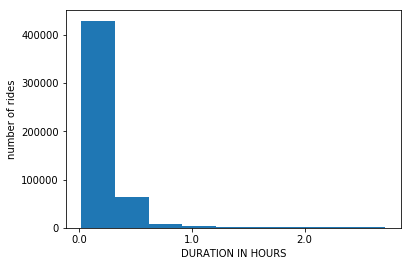

In [25]:
bins_e = np.arange(min(per.duration_hours), max(per.duration_hours),0.3)
ticks = np.arange(0, max(per.duration_hours),1)
plt.hist(data=df,x='duration_hours',bins=bins_e);
xlabel = ['{}'.format(val) for val in ticks]
plt.xticks(ticks, xlabel);
plt.xlabel('DURATION IN HOURS');
plt.ylabel('number of rides');

**The average for trip duration is below half an hour, and 99% of ridings durations are below 3 hours.**

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

All the variables distribution were acceptable, except duration in hours that has many outliers therefore scaling was needed.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

No, I didn't find any unusual distribution except in duration in hours
I changed start time and end time to date time datatype, and user type to a category data type.
I did this to can creat a new variables from it like start month and start weekday and do other operations

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

In [23]:
ct_counts=df.groupby(['strt_month', 'user_type']).size()
ct_counts=ct_counts.reset_index(name='count')
ct_counts=ct_counts.pivot(index='strt_month', columns='user_type', values= 'count')

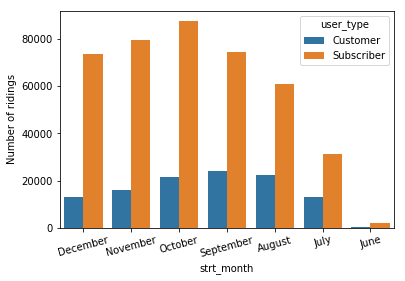

In [24]:
sb.countplot(data=df, x='strt_month', hue='user_type');
plt.ylabel('Number of ridings')
plt.xticks(rotation=15);

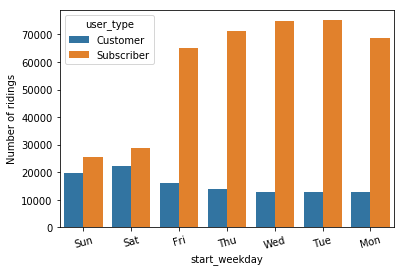

In [25]:
sb.countplot(data=df, x='start_weekday', hue='user_type');
plt.ylabel('Number of ridings')
plt.xticks(rotation=15);

**The previous two visualizations deonstrate that customer user type is always less than subscribers in all months and all days , but in sundays and saterdays they are very close .**

**The number of rides for customers increases in sunday and saturday**

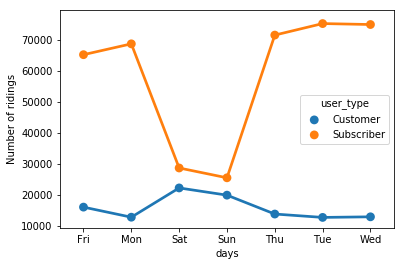

In [26]:
df_group = df.groupby(['start_weekday', 'user_type']).size().reset_index()
ax = sb.pointplot(data=df_group, x='start_weekday', y=0, hue = 'user_type');
plt.xlabel('days')
plt.ylabel('Number of ridings');

**This is another way to visualize weekdays with user type by using point plot and I reached the same conclusion.**

In [27]:
df.duration_hours.describe(percentiles = [.95])

count    519700.000000
mean          0.305280
std           0.956707
min           0.016944
50%           0.165556
95%           0.621944
max          23.991389
Name: duration_hours, dtype: float64

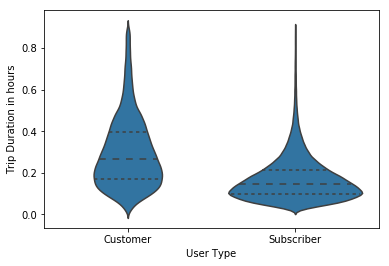

In [28]:
base_color=sb.color_palette()[0]
df_h=df.query('duration_hours<0.9')
sb.violinplot(data=df_h, x='user_type', y='duration_hours',color=base_color, inner='quartile');
plt.xlabel('User Type');
plt.ylabel('Trip Duration in hours');

**Here violin plot is used for quantative and qualitative features, The trip duration is shorter for  the subscribers compared to customers.**

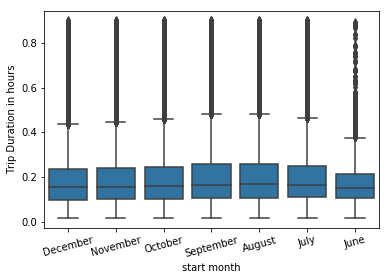

In [29]:
sb.boxplot(data=df_h, x='strt_month', y='duration_hours', color=base_color);
plt.xlabel('start month');
plt.ylabel('Trip Duration in hours');
plt.xticks(rotation=15);

**All the months have almost the same trip duration in hours for all the riders except in June.**

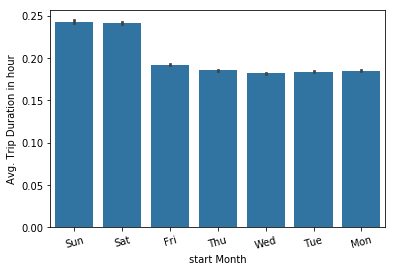

In [30]:
sb.barplot(data=df_h, x='start_weekday', y='duration_hours', color=base_color);
plt.xticks(rotation=15);
plt.xlabel('start Month');
plt.ylabel('Avg. Trip Duration in hour');

**The two days that have the least number of rides(sunday and saturday) for subscribers, have the highest average of trip duration.**

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

**I found out that the riders are more from the subscribers category not customers all the time, there is no relation between number of ridings per day or per month with the average trip duration as the days that have the highest average duration are the days that aslo have the lowest number of rides (subscriber rides).**

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

**The relationship between the average of trip duration in hours and the user type made me think that the subscribers spent more time in their trips because they have a goal to achieve or something.**

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

C:\Users\afrotto\Anaconda3\lib\site-packages\seaborn\axisgrid.py:703: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


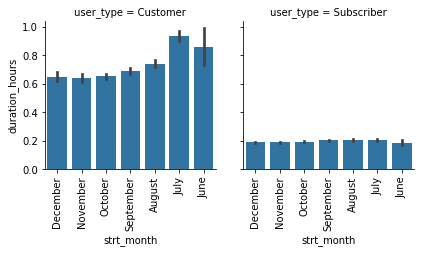

In [35]:
g=sb.FacetGrid(data=df_h, col='user_type', sharex=True)
g.map(sb.barplot, 'strt_month', 'duration_hours');
plt.xticks(rotation=90);
# iterate over axes of FacetGrid
for ax in g.axes.flat:
    labels = ax.get_xticklabels() 
    for i,l in enumerate(labels):
        ax.set_xticklabels(labels, rotation=90)

I've faced a problem that the names of the months were unreadable, so I used a code from stack overflow to solve it "https://stackoverflow.com/questions/43727278/how-to-set-readable-xticks-in-seaborns-facetgrid".

**customers spent much more time in the summer months.**

C:\Users\afrotto\Anaconda3\lib\site-packages\seaborn\axisgrid.py:703: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


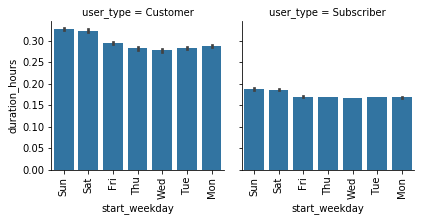

In [37]:
g=sb.FacetGrid(data=df_h, col='user_type', sharex=True)
g.map(sb.barplot, 'start_weekday', 'duration_hours');
plt.xticks(rotation=90);
# iterate over axes of FacetGrid
for ax in g.axes.flat:
    labels = ax.get_xticklabels() 
    for i,l in enumerate(labels):
        ax.set_xticklabels(labels, rotation=90)

**From the two previous plots the trip duration for subscribers ride much shorter compared to customers on each day of the week and every month.**

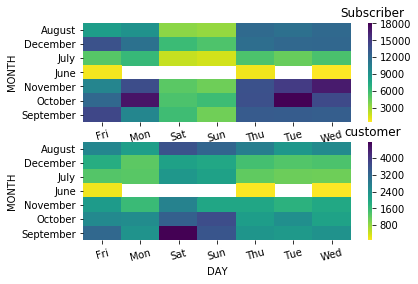

In [34]:
plt.subplot(2, 1, 1)
subscribers = df_h.query('user_type == "Subscriber"')
st_counts = subscribers.groupby(['strt_month', 'start_weekday']).size()
st_counts = st_counts.reset_index(name='count')
st_counts = st_counts.pivot(index='strt_month', columns='start_weekday', values='count')
sb.heatmap(st_counts, cmap='viridis_r');
plt.title('Subscriber', x=1.08);
plt.xlabel('DAY');
plt.ylabel('MONTH');
plt.xticks(rotation=15);

plt.subplot(2, 1, 2)
customers = df_h.query('user_type == "Customer"')
ct_counts = customers.groupby(['strt_month', 'start_weekday']).size()
ct_counts = ct_counts.reset_index(name='count')
ct_counts = ct_counts.pivot(index='strt_month', columns='start_weekday', values='count')
sb.heatmap(ct_counts, cmap='viridis_r');
plt.title('customer', x=1.08);
plt.xlabel('DAY');
plt.ylabel('MONTH');
plt.xticks(rotation=15);

**From this heat map we can see that both types of users have different pattern of Trip durations through all the weekdays and months, we can see that for customers the number of rides reach its max and exceeds 4000 in september on saturdays and for subscribers only 2 days that have always small number of rides through all months.** 

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

Multivariate visualizations made the relationship between the multiple variables more clear and visualized together to provide more information.
Plotting user type feature with duration of the trips and weekdays strengthened each othe.



### Were there any interesting or surprising interactions between features?

The relationship between the start month and the trip duration made me see that the riders preferred to start on the summer months more.